# Unsupervised Learning Predict

© Explore Data Science Academy

---


### Honour Code

We {**JS1**}, confirm - by submitting this document - that the solutions in this notebook are a result of our own work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

<a id="cont"></a>

# Table of Contents

* <a href=#1>1. Introduction</a>
  * <a href=#1.1>1.1 Project Overview</a>
  * <a href=#1.2>1.2 Data Overview</a>
 
* <a href=#2>2. Initialization</a>
  * <a href=#2.1>2.1 Importing Packages</a>
  * <a href=#2.2>2.2 Loading Data</a>

* <a href=#3>3. Exploratory Data Analysis (EDA)</a>
  *  <a href=#3.1>3.1  Data Overview</a>
  *  <a href=#3.2>3.2  Rating Distribution</a>
  *  <a href=#3.3>3.3  Ratings Per User</a>
  *  <a href=#3.4>3.4  Highly Rated Movies</a>
  *  <a href=#3.5>3.5  Popular Directors</a>
  *  <a href=#3.6>3.6  Number Of Movies Produced Each Year</a>
  *  <a href=#3.7>3.7 Most Common Genres </a>
  *  <a href=#3.8>3.8  WordClouds</a>

* <a href=#4>4. Data Engineering</a>
  * <a href=#4.1>4.1  Pre-Processing</a>
  * <a href=#4.2>4.2  Principal Component Analysis (PCA)</a>
  
* <a href=#5>5. Modeling</a>
  * <a href=#5.1>5.1 Normal Predictor</a>
  * <a href=#5.2>5.2 BaselineOnly</a>
  * <a href=#5.3>5.3 SVD</a>
  * <a href=#5.4>5.4 Non-Negative Matrix Factorization (NMF)</a>
  * <a href=#5.5>5.5 CoClustering</a>
  * <a href=#5.6>5.6 Tuned SVD</a>
  * <a href=#5.7>5.7 Another tuned SVD</a>

* <a href=#6>6. Model Performance</a>

* <a href=#7>7. References</a>

<a id="1"></a>
# 1. Introduction
<a href=#cont>Back to Table of Contents</a>

---

<a id="1.1"></a>
### 1.1 Project Overview

In today’s technology-driven world, recommender systems are socially and economically critical to ensure that individuals can make optimized choices surrounding the content they engage with on a daily basis. In general, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries). The Recommender system has the ability to predict whether a particular user would prefer an item or not based on the user’s profile. Recommender systems are beneficial to both service providers and users. They reduce transaction costs of finding and selecting items in an online shopping environment. Recommendation systems have also proved to improve the decision-making process and quality.


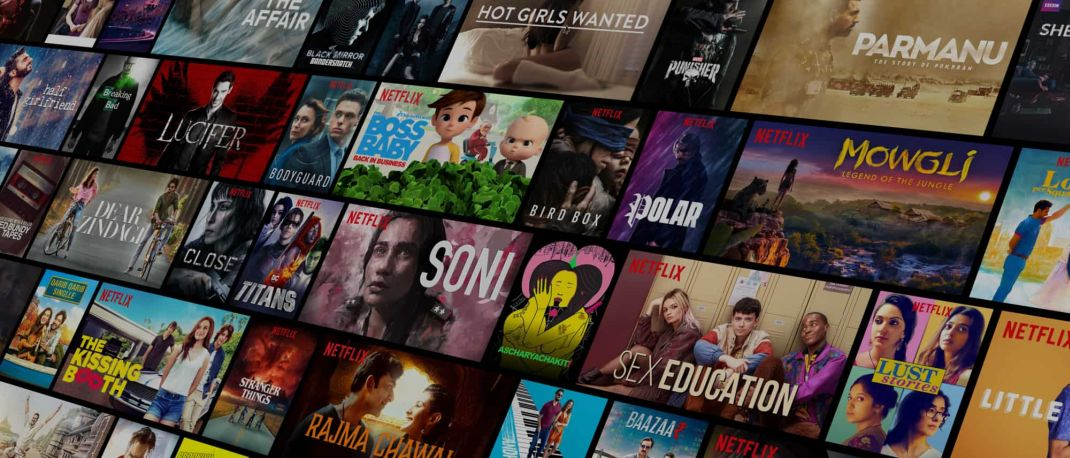


One application where this is especially true is movie recommendations, where intelligent algorithms can help viewers find great titles from tens of thousands of options. `DATA SPAN` will construct a recommendation algorithm based on collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed, based on their historical preferences. The Collaborative Filtering Recommender is entirely based on past behavior and not on the context. More specifically, it is based on the similarity in preferences, tastes, and choices of two users. It analyses how similar the tastes of one user are to another and makes recommendations on the basis of that. In general, collaborative filtering is the workhorse of recommender engines.

Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being personalized recommendations - generating platform affinity for the streaming services which best facilitate their audience's viewing.



<a id="1.2"></a>
### 1.2 Data Overview

The dataset used for this project consists of several million 5-star ratings obtained from users of the online [MovieLens](https://movielens.org/) movie recommendation service. The MovieLens dataset has long been used by industry and academic researchers to improve the performance of explicitly-based recommender systems.

For this Predict, we'll be using a special version of the MovieLens dataset which has been enriched with additional data and resampled for fair evaluation purposes.


The data for the MovieLens dataset is maintained by the [GroupLens](https://grouplens.org/) research group in the Department of Computer Science and Engineering at the University of Minnesota. Additional movie content data was legally scraped from [IMDB](https://www.imdb.com/).

<a id="2"></a>
# 2. Initialization
<a href=#cont>Back to Table of Contents</a>

---


<a id="2.1"></a>
### 2.1 Importing Packages

To begin we are going to import the libraries that we will need for completing this project.

In [56]:
#!pip install surprise
#!pip install seaborn
#!pip install wordcloud

# Imports of python libriries to be used in completing this priject

import pandas as pd
import numpy as np
import nltk
import string
import re
import pickle

from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import csr_matrix
import scipy as sp

# Hyperparameter tuning methods

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import train_test_split
from sklearn import metrics
from surprise import Reader


#Imports for modeling
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise.model_selection import GridSearchCV
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise import accuracy
from surprise.accuracy import rmse

from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
import seaborn as sns
from scipy import stats
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.metrics import plot_roc_curve
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

<a id="2.2"></a>
### 2.2 Loading Data

#### We are going to load the data from the supplied Files. Below are short descriptions of what each file contains.
- `genome_scores.csv` - a score mapping the strength between movies and tag-related properties. Read more here
- `genome_tags.csv` - user-assigned tags for genome-related scores
- `imdb_data.csv` - Additional movie metadata scraped from IMDB using the links.csv file.
- `links.csv` - File providing a mapping between a MovieLens ID and associated IMDB and TMDB IDs.
- `sample_submission.csv` - Sample of the submission format for the hackathon.
- `tags.csv` - User assigned for the movies within the dataset.
- `test.csv` - The test split of the dataset. Contains user and movie IDs with no rating data.
- `train.csv` - The training split of the dataset. Contains user and movie IDs with associated rating data.

In [57]:
#Loading the data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
imdb = pd.read_csv('imdb_data.csv')
links = pd.read_csv('links.csv')
tags = pd.read_csv('tags.csv')
movies = pd.read_csv('movies.csv')
g_scores = pd.read_csv('genome_scores.csv')
g_tags = pd.read_csv('genome_tags.csv')

<a id="3"></a>
# 3. Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

---
To gain an understanding of the datasets we are going to perform Exploratory data analysis, which is an essential step for exploring the data. Exploratory data analysis is the critical process of performing initial investigations on data so as to discover patterns, spot anomalies, test hypotheses and check assumptions with the help of summary statistics and graphical representations.

<a id="3.1"></a>
### 3.1 Data Overview

To get started we are going to display the overview of all the datasets we will be using for this project. This will help us to get and understand the structure of the data frames by printing the concise summary of each data frame, including the index data type and columns, non-null values, and the shape of the data frame.

In [60]:
# Overview of our dataset
print('TRAINING DATA')
print('============='+('\n'))
print('Shape of the dataset: {}\n'.format(train.shape))
print('Total Number of unique text: {}\n'.format(len(set(train['rating']))))
print('Total Number of missing values:\n{}\n\n'.format(train.isnull().sum()))
print('Head of the dataset: {}\n'.format(train.head(2)))

print('TEST DATA')
print('========='+('\n'))
print('Shape of the dataset: {}\n'.format(test.shape))
print('Total Number of missing values:\n{}\n' .format(test.isnull().sum()))
print('Head of the dataset: {}\n'.format(test.head(2)))

print('IMDB DATA')
print('========='+('\n'))
print('Shape of the dataset: {}\n'.format(imdb.shape))
print('Total Number of missing values:\n{}\n' .format(imdb.isnull().sum()))
print('Head of the dataset: {}\n'.format(train.head(2)))
print('Head of the dataset: {}\n'.format(imdb.head(2)))

print('LINKS DATA')
print('============='+('\n'))
print('Shape of the dataset: {}\n'.format(links.shape))
print('Total Number of missing values:\n{}\n\n'.format(links.isnull().sum()))
print('Head of the dataset: {}\n'.format(links.head(2)))

print('TAGS DATA')
print('========='+('\n'))
print('Shape of the dataset: {}\n'.format(tags .shape))
print('Total Number of missing values:\n{}\n' .format(tags .isnull().sum()))
print('Head of the dataset: {}\n'.format(tags.head(2)))


print('MOVIES DATA')
print('============='+('\n'))
print('Shape of the dataset: {}\n'.format(movies.shape))
print('Total Number of missing values:\n{}\n\n'.format(movies.isnull().sum()))
print('Head of the dataset: {}\n'.format(movies.head(2)))

print('GENOME_SCORE DATA')
print('============='+('\n'))
print('Shape of the dataset: {}\n'.format(g_scores.shape))
print('Total Number of missing values:\n{}\n\n'.format(g_scores.isnull().sum()))
print('Head of the dataset: {}\n'.format(g_scores.head(2)))

print('GENOME_TAGS DATA')
print('========='+('\n'))
print('Shape of the dataset: {}\n'.format(g_tags.shape))
print('Total Number of missing values:\n{}\n' .format(g_tags.isnull().sum()))
print('Head of the dataset: {}\n'.format(g_tags.head(2)))

<a id="3.2"></a>
### 3.2 Ratings Distribution

Within a recommender system, there are two primary sets of entities: the Users and the Items. Items are things that are consumed, Which are the movies in our case and Users are individuals who interact with the items in a recommendation system. Through their actions, users create ratings for specific items within a recommendation system. A given user can have ratings for many items in the system or none at all. Generally, as a user continues to interact with a recommender system, the more it will be able to capture her preferences and ratings for items. With that said the first dataset we are going to explore is the train dataset as it contains the important features to be used in building our recommender system, i.e.
- userId which represents the users who through their actions create ratings for specific items
- movieId which represents all the movies in the dataset
- rating with all the ratings from the users
- timestamp 

Firstly we are going to look into the rating distributions given by users to discover whether users do give ratings and if they do, how?


In [10]:
print('There are ',train["userId"].nunique(), 'users and',train.movieId.nunique(),'movies in the dataset')

In [11]:
print('There are ',train["rating"].count(), 'ratings')

There are 162541 users, 48213 movies and 10000038 ratings in the dataset.

In [12]:
# distribution of ratings
with sns.axes_style('white'):
    g = sns.factorplot("rating", data=train, aspect=2.0,kind='count')
    g.set_ylabels("Total number of ratings")
print (f'Average rating in dataset: {np.mean(train["rating"])}')

To get a more concise view, we are going to plot in logical order

In [13]:
# distribution of ratings in logical order order
train['rating'].value_counts().plot(kind = 'bar', xlabel = 'Rating', ylabel = 'Total number of ratings', color = 'MediumSlateBlue')

#### Observation:
From the distribution of ratings given by the users, we see that users generally rated positively more than negatively as there is evidence of a higher proportion of positive ratings being given over negative ones. It appears that users are quite generous in their ratings. The mean rating is 3.5 on a scale of 5. Half the movies have a rating of 4 and 5.

<a id="3.3"></a>
### 3.3 Ratings Per User

- Next, we are going to review the ratings per user to see the users who gave the most ratings, we believe that each user rated multiple times.

In [14]:
train1 = train.copy()
train1.drop('timestamp', axis = 1, inplace = True)

In [15]:
def user_ratings_count(df, n):

    plt.figure(figsize=(8,6))
    data = df['userId'].value_counts().head(n)
    ax = sns.barplot(x = data.index, y = data, order= data.index, color='MediumSlateBlue'
                     , edgecolor="black")
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % int(p.get_height()), fontsize=11, ha='center', va='bottom')
    plt.title(f'Top {n} Users by Number of Ratings', fontsize=14)
    plt.xlabel('User ID')
    plt.ylabel('Number of Ratings')
    print("Combined number of ratings:\t",df['userId'].value_counts().head(n).sum(),
         "\nTotal number of movies:\t\t", df['movieId'].nunique())
    plt.show()
    
user_ratings_count(train1,10)

#### Observation:
There are super raters, such as userID 72315 that have made more than 10 000 ratings. More than 100 000 users have rated more than 10 times. Insight drawn from this graph is that a lot of people do rate movies therefore there are more user ratings to be used in recommender systems.

<a id="3.4"></a>
### 3.4 Highly Rated Movies

- We will now look into the highly rated movies. Movies with the highest number of ratings given by users. Which are the movies most likely to be recommended to new users.
To do this analysis we are going to merge the train and movies dataset using the common feature movieId in order to get the movie title.

In [16]:
df = pd.merge(train, movies, on='movieId')

df1=df.groupby(['title'])[['rating']].sum()

high_rated=df1.nlargest(20,'rating')
high_rated.head()


In [17]:
plt.figure(figsize=(30,10))
plt.title('Top 20 movies with highest rating',fontsize=40)
plt.ylabel('ratings',fontsize=20)
plt.xticks(fontsize=13,rotation=90)
plt.xlabel('movies title',fontsize=20)
plt.yticks(fontsize=13)
plt.bar(high_rated.index,high_rated['rating'],linewidth=3,edgecolor='black',color = 'MediumSlateBlue')

#### Observation:
From the visual above we can see that the high-rated movies received over 80 000 total ratings from users with the highest movie with a total number rating of 145035.0 (Shawshank Redemption, The (1994)). With this evidence, we can conclude that movies with high ratings are highly recommended and most likely to be recommended to new users.

<a id="3.5"></a>
### 3.5 Popular Directors

In [18]:
#Plotting movie directors who directed popular movies
plt.figure(figsize = (10,6))

axes=sns.countplot(y=imdb['director'], order = imdb['director'].value_counts().index[1:21],color='blue')

axes.set_title('Most Popular Movie Directors, Top 20',fontsize=15)

plt.show()

#### Observation:
Movie recommendations can be made from the most popular directors as users might most likely watch movies produced by popular producers.

<a id="3.6"></a>
### 3.6 Number of Movies Produced Each Year

In [19]:
#Plotting total amount of movies released in a year for the past years 

movies['year_released']=movies['title'].str[-5:-1]
figure= plt.subplots(figsize=(15, 5))

axes=sns.countplot(x=movies['year_released'], order = movies['year_released'].value_counts()[0:30].index,color='blue')

axes.set_title('Movies Released The Past Years',fontsize=19)

plt.xticks(rotation=90)

plt.show()

### Observation
As we can see that the number of movies released per year has been increasing exponentially over the number of years, which shows it has become easier compared to the past to make a movie.

<a id="3.7"></a>
### 3.7 Most Common Genres

We then looked into the most common genres.

In [20]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies[['movieId', 'genres']],
                             columns=['movieId', 'genres'])
# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])


In [21]:
# Plot the genres from most common to least common
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              color = 'MediumSlateBlue')
plt.show()

#### Observation:
* The graph above shows that the most common genres are drama, comedy, thriller, etc. 
* People love drama movies more than any other genre therefore more of those should always form part of a user's recommendation. 
* Children and animation genres are equally common and this could be attributed to the fact that most children's movies are animated.

<a id="3.8"></a>
### 3.8 WordClouds

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance.


In [22]:
# A fuction for getting the titles and genres of the movies
genres=[]
for genre in movies.genres:
    
    x=genre.split('|')
    for i in x:
         if i not in genres:
            genres.append(str(i))
genres=str(genres)    
movie_title=[]
for title in movies.title:
    movie_title.append(title[0:-7])
movie_title=str(movie_title)
# tag_s=[]
# for tag in tags.tag:
    
#     x=tag.split('|')
#     for i in x:
#          if i not in tag_s:
#             tag_s.append(str(i))
# tag_s=str(tag_s) 

In [23]:
wordcloud_genre=WordCloud(width=1500,height=800,background_color='black',min_font_size=2
                    ,min_word_length=3).generate(genres)
wordcloud_title=WordCloud(width=1500,height=800,background_color='cyan',min_font_size=2
                    ,min_word_length=3).generate(movie_title)

In [24]:
# Wordcloud for Movies Genre

plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('Wordcloud for Movies Genre',fontsize=30)
plt.imshow(wordcloud_genre)

In [25]:
# Wordcloud for Movies title 

plt.figure(figsize=(30,10))
plt.axis('off')
plt.title('Wordcloud for Movies title',fontsize=30)
plt.imshow(wordcloud_title)

#### Data Observation
The word cloud graphical representations support the above theories of the most common genres and high-rated movies by indicating the most commonly occurring words.

<a id="5"></a>
# 4. Data Engineering
​
---
The performance of the model is dependent on data preprocessing and data handling. Should we build a model without handling data, we are likely to get results that yield a low predictive accuracy. By applying feature engineering to the same model, we could increase the predictive accuracy and thus, improve the performance of our model.


#### PLEASE NOTE: The data engineering section used in this notebook will not be used in the modeling section because it does not improve our model performance.


<a id="5.1"></a>
### 4.1 Pre-Processing

The Movies data has both the title and the release year in the column "title," as can be observed in the previous part while exploring our data, therefore we added a new column called "release year."

In [ ]:
#extracting released year
movies_ = movies.copy()
movies_['release_year']=movies_['title'].str[-5:-1] 
#spliting the genres into a list
movies_['genres']=movies_['genres'].str.split('|') 
 
movies_.head(3)

In [ ]:
#spliting the title cast into a list
imdb_ = imdb.copy()
imdb_['title_cast']=imdb_['title_cast'].str.split('|') 
imdb_.head(3)

In [ ]:
#concatinating the train and movies dataset
train_ = train.copy()
con = pd.concat([train[:1000],movies], axis=1)
con.head(3)

In [ ]:
#concatinating the train, movies and imdb
df= pd.concat([imdb_,con], axis=1)
df.dropna(inplace=True)
df.head(3)

In [ ]:
#merging the movies dataframe with the imdb and merging genome scores and genome tags dataframes
movies_df = movies.copy()
metadata =pd.merge(movies_df,imdb,how = 'left',on = 'movieId')
genome_ = pd.merge(g_scores,g_tags, how='left',on='tagId')

In [ ]:
metadata_stats = metadata.copy()
genome_stats = genome_.copy()
metadata_stats= pd.DataFrame(metadata.describe())
genome_stats = pd.DataFrame(genome_.describe())

From the Exploratory data analysis, we discovered that five out of the six columns in the IMDB dataset have a lot of null values. The budget column contains the most null values of any column. We made the decision to drop categorical columns which consisted of missing values in order to deal with the null values. Considering that the "runtime" column was numerical, we then changed the null values there with the column's mean.

In [ ]:
metadata1 = metadata.copy() 

metadata1.drop(['title_cast','director','budget','plot_keywords'],
  axis='columns',inplace=True)

metadata1['runtime'].fillna((metadata1['runtime'].mean()), inplace=True)

In [ ]:
df1 = pd.merge(metadata1,genome_,how = 'left',on = 'movieId')

In [ ]:
# Extracting released year

df1['release_year']=df1['title'].str[-5:-1] 
df1['release_year'].replace('[^\(.*\)?]','', regex=True)

# Spliting the genres into a list
df1['genres']=df1['genres'].str.split('|')

In [ ]:
tf = TfidfVectorizer(smooth_idf=False, sublinear_tf=False, norm=None, analyzer='char')
new_df = tf.fit_transform(df1).toarray()

<a id="5.2"></a>
### 4.2 Principal component analysis (PCA)

The fundamental idea behind PCA is that data with a larger number of dimensions can be mapped to data with a smaller number of dimensions while 
maintaining the highest possible level of variation in the lower dimension
​
we used a standard scaler to scale our data

In [ ]:
# scaling the data
scaler = StandardScaler(with_mean=False)
pca =PCA()
pipeline = make_pipeline(scaler,pca)

In [ ]:
# Plot the variance vs PCA features to visualize how our data is spread out
pipeline.fit_transform(new_df)
features=range(pca.n_components_)
features = features
plt.bar(features,pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


<a id="5"></a>
# 5. Modeling
<a href=#cont>Back to Table of Contents</a>

---

Now, comes the fun part where we finally get to use the prepared data for model building. In this section, we are going to train a few models on the train data. The training set is used to build the predictive models and then the trained models are then applied to the testing set (unseen data) to make predictions. The selection of the best model is made on the basis of the model’s performance on the testing set and in an effort to obtain the best possible model, hyperparameter optimization will also be performed.


In [26]:
# Prepare data for train test split

train = train.drop(['timestamp'], axis = 1)
reader = Reader(rating_scale=(0.5, 5))
train = Dataset.load_from_df(train[['userId', 'movieId', 'rating']], reader)

- To ensure that the models perform well on new, unseen data we will split our data into two portions. The first portion is the larger data subset that is used as the training set (<= 80% of the original data) and the second portion is the smaller subset used as the testing set (the remaining >=20% of the data).

In [27]:
# Train test split
trainset, valset = train_test_split(train, test_size = 0.008, random_state = 42)

<a id="5.1"></a>
### 5.1 Normal Predictor


The normal predictor algorithm predicts the movie ratings based on the user-movie matrix of the training data. First, the algorithm assumes that the observed movie ratings in the training data follow a normal distribution, 
N(μ^,σ^2)
. This means that there are only a small number of low ratings as well as a small number of high ratings. Most ratings are somewhere in the middle. The normal distribution has the following shape:


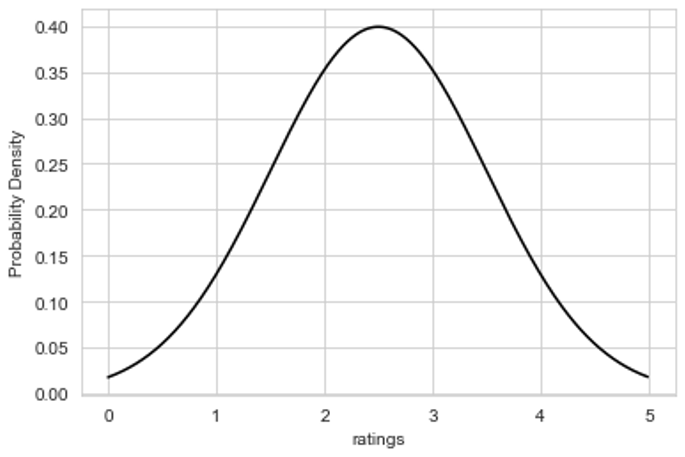

Using this assumption, the average rating denoted by, $\hat{\mu}$, and the standard deviation denoted by, $\hat{\sigma}$ of the predicted rating, $\hat{r}_{um}$, can be calculated using maximum likelihood estimation. The equations are given by,

$$
    \begin{align*}
      \hat{\mu} &= \frac{1}{|R_{train}|} \sum_{r_{um} \in R_{train}} r_{um} \\
      \\
      \hat{\sigma} &= \sqrt{\sum_{r_{um} \in R_{train}} \frac{(r_{um} - \hat{\mu})^2}{|R_{train}|}}
    \end{align*}
  $$

Now we implement the normal predictor algorithm.

In [28]:
# Create Model
normal = NormalPredictor()

In [29]:
# Train the algorithm on the trainset and predict ratings for test set
normal.fit(trainset)
predict_normal = normal.test(valset)

In [30]:
# Compute the rmse for normal predictor
rmse_normal = accuracy.rmse(predict_normal)

<a id="5.2"></a>
### 5.2 BaselineOnly


Data used to build recommender systems often have user and item bias or effects. In our context, some movies may receive higher or lower ratings than others and some users may give higher or lower ratings than others. We need to adjust the data and take this bias into account. The Baseline only algorithm models the bias using the baseline estimates. The baseline estimate for a predicted rating, $\hat{r}_{um}$ can be written as,

$$ \hat{r}_{um} = b_{um} = \mu + b_{u} + b_m ,$$

where $\mu$ is the average rating, $b_u$ is the bias of user $u$ and $b_m$ is the bias for movie $m$. This algorithm estimates $b_u$ and $b_m$ by minimizing the following regularized squared error using the alternating least squares(ALS) method:

$$ \min\limits_b \sum \limits_{(u,m) \in \mathcal{K}} (r_{um} - \mu - b_u - b_m)^2 + \lambda_1 \biggl( \sum\limits_u b_u^2 + \sum_m b_m^2 \biggr)$$

To give a basic example of how this algorithm takes the bias into account, let's suppose we want to calculate a baseline estimate for the rating of the movie Jumanji by a user named John. Also assume that the mean rating for all the movies is 3.2 stars. Furthermore, let's suppose that Jumanji tends to be rated 0.8 stars above the mean and that John tends to rate movies 0.4 stars lower than the mean. Then the baseline estimate for Jumanji's rating by John would be equal to 3.2 - 0.4 + 0.8 = 3.6 stars. 

Now we implement the baseline only algorithm.


In [31]:
# Create Model
baseline = BaselineOnly()

In [32]:
# Train the algorithm on the trainset and predict ratings for test set
baseline.fit(trainset)
predict_baseline = baseline.test(valset)

In [33]:
# Compute the rmse for baseline only
rmse_baseline = accuracy.rmse(predict_baseline)

<a id="5.3"></a>
### 5.3 SVD


The SVD algorithm map the users and movies to a factor space that exists in d dimension. Since the interactions between the users and movies are modeled as inner products in that factor space, each user has a corresponding vector $p_u \in \Re^d$ and each movie has a corresponding vector $q_m \in \Re^d$. The following image is a simplified two dimensional (male versus female and serious versus escapist) illustration of a factor space that contains both users and movies:

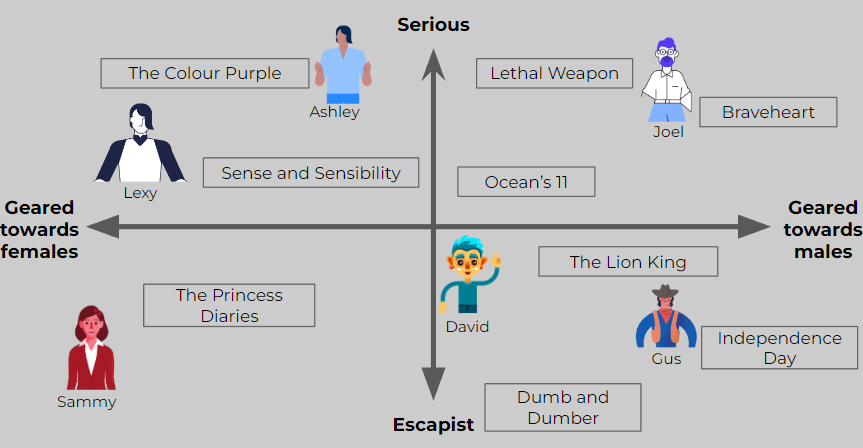


The vector $q_m$ measures to what degree movie $m$ contains the characteristics that make up the factor space, where those factors can be positive or negative. Similarly the vector $p_u$ measures to what degree user $u$ is interested in movies that contain a high or low degree of the factor space characteristics. Therefore the dot product between $p_u$ and $q_m$ gives us the interaction between user $u$ and movie $m$ and thus the estimated rating of user $u$ for movie $m$ can be given as,

$$ \hat{r}_{um} = q_m^T p_u $$

Our implementation of SVD takes into account the bias of users for certain movies (as explained for the baseline only algorithm). Therefore our predicted rating is rewritten as,

$$ \hat{r}_{um} = \mu + b_u + b_m + q_m^T p_u $$

The algorithm learns $p_u$ and $q_m$ by minimizing the following regularized squared error on the training data, $\mathcal{K}$, using the gradient descent method:

$$ \sum\limits_{r_{um} \in \mathcal{K}} (r_{um} - \hat{r}_{um})^2 + \lambda \biggl( b_m^2 + b_u^2 + ||q_m||^2 + ||p_u||^2 \biggr) $$

Now we implement the SVD algorithm.


In [34]:
# Create Model
svd = SVD()

In [35]:
# Train the algorithm on the trainset and predict ratings for test set
svd.fit(trainset)
predict_svd = svd.test(valset)

In [36]:
# compute the rmse for basic SVD
rmse_svd = accuracy.rmse(predict_svd)

<a id="5.4"></a>
### 5.4 Non-Negative Matrix Factorization (NMF)

The non-negative matrix factorization algorithm is similar to svd with only a few differences. Firstly, the user and movie bias is not taken into consideration. Hence the ratings are estimated as follows:

$$\hat{r}_{um} = q_m^T p_u $$

Furthermore, the factors remain positive and therefore during model training the gradient descent method updates $p_u$ and $q_m$ as follows:

$$ p_{u} \leftarrow p_{u} \cdot \frac{\sum\limits_{m \in M} q_{m} \cdot r_{um}}{\sum\limits_{m \in M} q_{m} \cdot \hat{r}_{um} + \lambda_u |M| p_{u}} $$

$$ q_{m} \leftarrow q_{m} \cdot \frac{\sum\limits_{u \in U} p_{u} \cdot r_{um}}{\sum\limits_{u \in U} p_{u} \cdot \hat{r}_{um} + \lambda_i |U| q_{m}}$$

Now we implement the non-negative matrix factorization algorithm

In [37]:
# Create Model
nmf = NMF()

In [38]:
# Train basic NMF and predict ratings with validation set
nmf.fit(trainset)
predict_nmf = nmf.test(valset)

In [39]:
# Compute the rmse for basic NMF
rmse_nmf = accuracy.rmse(predict_nmf)

<a id="5.5"></a>
### 5.5 CoClustering

The co-clustering algorithm is a simple clustering algorithm where the movies are assigned to a cluster, $C_m$, the users are assigned to a cluster, $C_u$, and the movies and users are assigned to a co-cluster, $C_{um}$. Then we find the average rating of the movie cluster, $\bar{C_m}$, the average rating of the user cluster, $\bar{C_u}$, and the average rating of the co-cluster, $\bar{C_{um}}$. Then the movie ratings are estimated as follows:

 $$\hat{r}_{um} = \bar{C_{um}} + (\mu_u - \bar{C_u}) + (\mu_m - \bar{C_m})$$
 
 Now we implement the co-clustering algorithm

In [40]:
# Create Model
cocluster = CoClustering()

In [41]:
# Train basic CoCluster and predict ratings with validation set
cocluster.fit(trainset)
predict_cocluster = cocluster.test(valset)

In [42]:
# Compute the rmse for basic CoCluster
rmse_cocluster = accuracy.rmse(predict_cocluster)

* From the results of the RMSE we can see that the SVD algorithm is the best performing model. We will apply hyperparameter tuning to the SVD model in order to improve it. Tuning is typically performed so as to arrive at the optimal set of values to use for the hyperparameters.

<a id="5.6"></a>
### 5.6 Tuned SVD

In [43]:
svd_tuned = SVD(n_factors = 160,
                n_epochs=21,
                init_std_dev=0.01,
                lr_all=0.0085, 
                )

In [44]:
# Train the algorithm on the trainset and predict ratings for validation set
svd_tuned.fit(trainset)
predict_svd_tuned = svd_tuned.test(valset)

In [45]:
# compute the rmse for tuned SVD
rmse_svd_tuned = accuracy.rmse(predict_svd_tuned)

In [46]:
# Predict on the test set
pred_svd = [svd_tuned.predict(row.userId,
                               row.movieId) for idx,row in test.iterrows()]

In [47]:
# Convert predictions to dataframe
pred_svd_df = pd.DataFrame(pred_svd)

# Rename columns and drop irrelevant columns
pred_svd_df = pred_svd_df.drop(['r_ui', 'details'], axis=1)
pred_svd_df = pred_svd_df.rename(columns = {'uid':'userId',
                                             'iid':'moviesId',
                                             'est':'rating'})

# Concatenate userId and movieId for kaggel submission
pred_svd_df['Id'] =  pred_svd_df['userId'].astype(str).str.zfill(1) + '_' + pred_svd_df['moviesId'].astype(str).str.zfill(1)

In [48]:
# Prep final kaggle submission file
pred_svd_df_kag = pred_svd_df[['Id','rating']]
pred_svd_df_kag.to_csv('svd.csv', index=False)

In [49]:
# pickle the trained model
with open('svd_tuned.pkl', 'wb') as file:
    pickle.dump(svd_tuned, file)

<a id="5.7"></a>
### 5.7 Another tuned SVD

In [50]:
# Prep entire train set for model training
train = train.build_full_trainset()

In [51]:
svd_tuned_one = SVD(n_factors = 3000,
                    n_epochs=21,
                    init_std_dev=0.01,
                    lr_all=0.0085, 
                    )

In [52]:
# Train the algorithm on the trainset 
svd_tuned_one.fit(train)

In [ ]:
# Predict on the test set
pred_svd_tuned_one = [svd_tuned_one.predict(row.userId,
                               row.movieId) for idx,row in test.iterrows()]

In [ ]:
# Convert predictions to dataframe
pred_svd_tuned_one_df = pd.DataFrame(pred_svd_tuned_one)

# Rename columns and drop irrelevant columns
pred_svd_tuned_one_df = pred_svd_tuned_one_df.drop(['r_ui', 'details'], axis=1)
pred_svd_tuned_one_df = pred_svd_tuned_one_df.rename(columns = {'uid':'userId',
                                             'iid':'moviesId',
                                             'est':'rating'})

# Concatenate userId and movieId for kaggel submission
pred_svd_tuned_one_df['Id'] =  pred_svd_tuned_one_df['userId'].astype(str).str.zfill(1) + '_' + pred_svd_tuned_one_df['moviesId'].astype(str).str.zfill(1)

In [ ]:
# Prep final kaggle submission file
pred_svd_tuned_one_df_kag = pred_svd_tuned_one_df[['Id','rating']]
pred_svd_tuned_one_df_kag.to_csv('svd_tuned_one.csv', index=False)

In [ ]:
# pickle the trained model
with open('svd_tuned_one.pkl', 'wb') as file:
    pickle.dump(svd_tuned_one, file)

<a id="5.7"></a>
### 5.8 Last tuned SVD

In [ ]:
svd_tuned2 = SVD(n_factors = 10000, 
          lr_all=0.0095, 
          reg_all=0.02, 
          n_epochs=22, 
          init_std_dev=0.001,
          random_state=42)

In [ ]:
# Train the algorithm on the trainset and predict ratings for test set
svd_tuned2.fit(trainset)
predict_svd_tuned2 = svd_tuned2.test(valset)

In [ ]:
# pickle the trained svd_tuned2 model
with open('svd_tuned2.pkl', 'wb') as file:
    pickle.dump(svd_tuned2, file)

In [ ]:
# compute the rmse for tuned SVDpp
rmse_svd_tuned2 = accuracy.rmse(predict_svd_tuned2)

In [ ]:
# Log tuned SVD data to comet
params_svd_tuned2 = {'model_class': 'Matrix Factorization-based algorithms',
              'model_type': 'SVD',
              'tuned': 'Yes',
              'test_size': 0.008,
              'random_state': 42,
              'n_factors': 10000,
              'n_epochs':22,
              'init_std_dev':0.001,
              'lr_all': 0.0095,
              'reg_all': 0.02}

metrics_svd_tuned2 = {'RMSE': rmse_svd_tuned2}

experiment.log_parameters(params_svd_tuned2)
experiment.log_metrics(metrics_svd_tuned2)

experiment.end()

In [ ]:
# Predict on the test set
pred_svd_tuned2 = [svd_tuned2.predict(row.userId,
                               row.movieId) for idx,row in test.iterrows()]
# Convert predictions to dataframe
pred_svd_tuned2_df = pd.DataFrame(pred_svd_tuned2)

# Rename columns and drop irrelevant columns
pred_svd_tuned2_df = pred_svd_tuned2_df.drop(['r_ui', 'details'], axis=1)
pred_svd_tuned2_df = pred_svd_tuned2_df.rename(columns = {'uid':'userId',
                                             'iid':'moviesId',
                                             'est':'rating'})

# Concatenate userId and movieId for kaggel submission
pred_svd_tuned2_df['Id'] =  pred_svd_tuned2_df['userId'].astype(str).str.zfill(1) + '_' + pred_svd_tuned2_df['moviesId'].astype(str).str.zfill(1)

# Prep final kaggle submission file
pred_svd_tuned2_df_kag = pred_svd_tuned2_df[['Id','rating']]
pred_svd_tuned2_df_kag.to_csv('svd_tuned_two.csv', index=False)

The last tuned SVD model is the best performing one with an emproved RMSE score from the previous one. The lower the RMSE score the better the perfomance

<a id="6"></a>
# 6. Model Performance
<a href=#cont>Back to Table of Contents</a>

---

When evaluating our models' performance, we will use a metric called Root Mean Squared Error (RMSE). Root mean square error or root mean square deviation is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values using Euclidean distance. Root Mean Square Error (RMSE) is the standard deviation of the residuals (prediction errors). Residuals are a measure of how far from the regression line data points are; RMSE is a measure of how spread out these residuals are. In other words, it tells you how concentrated the data is around the line of best fit.

*Based on a rule of thumb, it can be said that RMSE values between 0.2 and 0.5 shows that the model can relatively predict the data accurately. 
In addition, Adjusted R-squared more than 0.75 is a very good value for showing the accuracy. In some cases, Adjusted R-squared of 0.4 or more is acceptable as well.*


- Now we will create a bar graph to compare the performance of our models

In [ ]:
# Bar graph for model performance (based off rmse)
# Plot bar graph comparing rmse score of each model
rmse_dict = {'model': ['normal', 'cocluster', 'nmf', 'baseline', 'svd', 'svd_tuned'],
             'rmse': [rmse_normal, rmse_cocluster, rmse_nmf, rmse_baseline, rmse_svd, rmse_svd_tuned]}

rmse_df = pd.DataFrame(rmse_dict)

sns.set_style('whitegrid')
sns.barplot(x = 'model', y = 'rmse', data = rmse_df)
plt.title('Compare performance of models')
plt.xlabel('Model')
plt.ylabel('RMSE')


The svd model has the best performance. The performance of the svd model improves slightly when we tune the hyperparameters. Since the assumption that 
the observed movie ratings are normally distributed does not hold, the  normal predictor has the worst performance with a high RMSE score and the tuned SVD is the best perfoming with the lowest RMSE score and with it we have the best model with accurate predictions for our recommender system.

<a id="7"></a>
# 7. References
<a href=#cont>Back to Table of Contents</a>

---

### Links
* [Scikit-Learn Documentaion](https://scikit-learn.org/stable/modules/classes.html)
* [How to use t-SNE Effectively](https://distill.pub/2016/misread-tsne/)
* [Multi-dimensional Scaling (MDS)](https://scikit-learn.org/stable/modules/manifold.html#multidimensional-scaling)
* [Movie Recommender System using Python](https://www.youtube.com/watch?v=R64Lh1Qwl_0)
* [Scikit-surprise documentation](https://surprise.readthedocs.io/en/stable/prediction_algorithms_package.html)
* [Explanations of algorithms](https://xuwd11.github.io/Recommender_Systems/04_collaborative_filtering.html#introduction)
* [Factor in the Neighbors: Scalable and Accurate Collaborative Filtering](https://courses.ischool.berkeley.edu/i290-dm/s11/SECURE/a1-koren.pdf)
* [Matrix Factorization Techniques For Recommender Systems](https://datajobs.com/data-science-repo/Recommender-Systems-%5BNetflix%5D.pdf)